In [1]:
# importing functions from grd_function.py file
from grd_functions import load_sentinel1_data, radiometric_calibration,parse_radiometric_calibration_lut, \
    parse_thermal_noise_removal_lut,remove_thermal_noise

# additional package to plot data
import matplotlib.pyplot as plt 

In [2]:
#defining .SAFE folder path
safe_folder = "data/S1A_IW_GRDH_1SDV_20241209T015852_20241209T015917_056909_06FD49_AE78.SAFE"
ds = load_sentinel1_data(safe_folder)

Reading VV band
Reading VH band
Data loaded successfully


In [3]:
#calling function to loac sentinel 1 data by passing .SAFE format file_path
ds=load_sentinel1_data(safe_folder)

Reading VV band
Reading VH band
Data loaded successfully


In [4]:
print(ds["VV"].rio.crs)

print("------VV band data----------")
print(ds["VV"])

print("------VH band data----------")
print(ds["VH"])

EPSG:4326
------VV band data----------
<xarray.DataArray 'VV' (y: 16676, x: 26309)> Size: 877MB
[438728884 values with dtype=uint16]
Coordinates:
    spatial_ref  int64 8B 0
Dimensions without coordinates: y, x
Attributes:
    TIFFTAG_IMAGEDESCRIPTION:  Sentinel-1A IW GRD HR L1
    TIFFTAG_SOFTWARE:          Sentinel-1 IPF 003.90
    TIFFTAG_DATETIME:          2024:12:09 05:08:02
    AREA_OR_POINT:             Area
    scale_factor:              1.0
    add_offset:                0.0
------VH band data----------
<xarray.DataArray 'VH' (y: 16676, x: 26309)> Size: 877MB
[438728884 values with dtype=uint16]
Coordinates:
    spatial_ref  int64 8B 0
Dimensions without coordinates: y, x
Attributes:
    TIFFTAG_IMAGEDESCRIPTION:  Sentinel-1A IW GRD HR L1
    TIFFTAG_SOFTWARE:          Sentinel-1 IPF 003.90
    TIFFTAG_DATETIME:          2024:12:09 05:08:49
    AREA_OR_POINT:             Area
    scale_factor:              1.0
    add_offset:                0.0


In [5]:
# Calling function for parsing thermal noise removal Lookup Table (LUT)
thermal_lut_ds=parse_thermal_noise_removal_lut(safe_folder)

Reading xml for VH band
Reading xml for VV band
Thermal noise removal LUT created successfully


In [6]:
# Calling function to remove thermal noise from the datasets
thermal_noise_corrected_ds = remove_thermal_noise(ds, thermal_lut_ds)

Thermal noise removed successfully


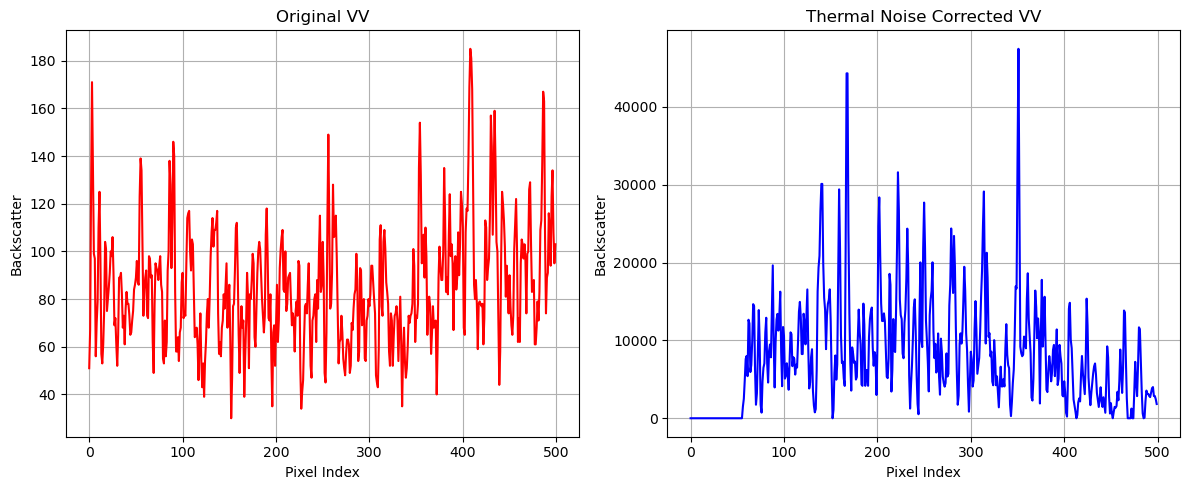

In [7]:
import matplotlib.pyplot as plt

# Only extracting line 5000 and plotting 500 values 
original_vv = ds['VV'].isel(x=5000).values.flatten()[:500]
corrected_vv = thermal_noise_corrected_ds['VV'].isel(line=5000).values.flatten()[:500]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot original
axs[0].plot(original_vv, color='red')
axs[0].set_title("Original VV")
axs[0].set_xlabel("Pixel Index")
axs[0].set_ylabel("Backscatter")
axs[0].grid(True)

# Plot corrected
axs[1].plot(corrected_vv, color='blue')
axs[1].set_title("Thermal Noise Corrected VV")
axs[1].set_xlabel("Pixel Index")
axs[1].set_ylabel("Backscatter")
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [8]:
# Calling function for parsing radiometric calibration LUT
sigma_nought_lut=parse_radiometric_calibration_lut(safe_folder, "sigmaNought")

Reading calibration for VV band
Reading calibration for VH band
Radiometric calibration LUT created successfully


In [9]:
# Calling function to apply radiometric calibration in dataset and this method must be applied after applying thermal noise removal
radiometric_calibrated_ds=radiometric_calibration(thermal_noise_corrected_ds, sigma_nought_lut)

Radiometric calibration completed successfully


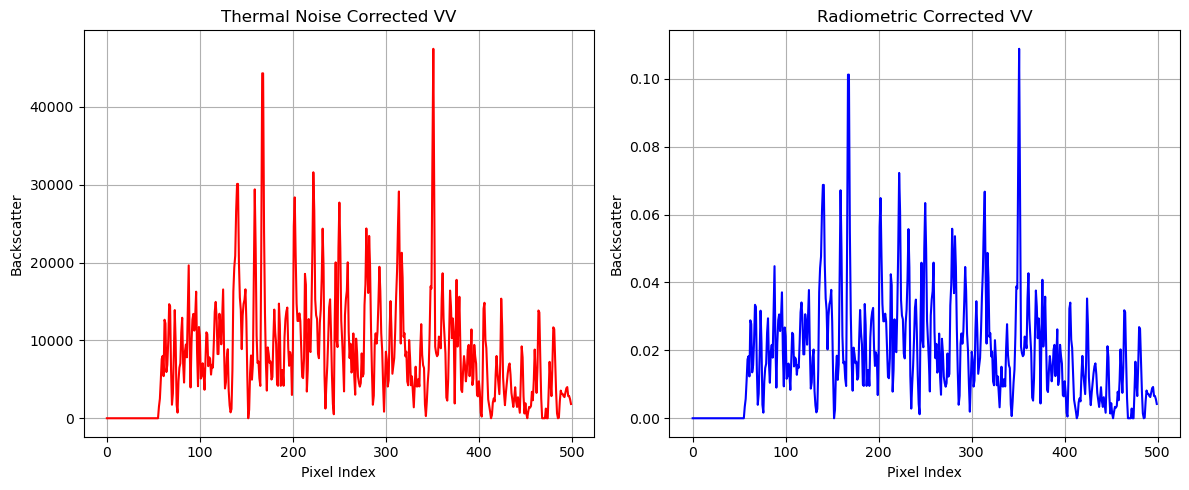

In [10]:
# similarly plotting result after radiometric calibration 
# Flatten data
original_vv = thermal_noise_corrected_ds['VV'].isel(line=5000).values.flatten()[:500]
corrected_vv = radiometric_calibrated_ds['VV'].isel(line=5000).values.flatten()[:500]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot original
axs[0].plot(original_vv, color='red')
axs[0].set_title("Thermal Noise Corrected VV")
axs[0].set_xlabel("Pixel Index")
axs[0].set_ylabel("Backscatter")
axs[0].grid(True)

# Plot corrected
axs[1].plot(corrected_vv, color='blue')
axs[1].set_title("Radiometric Corrected VV")
axs[1].set_xlabel("Pixel Index")
axs[1].set_ylabel("Backscatter")
axs[1].grid(True)

plt.tight_layout()
plt.show()

### Remarks

I compared the result of thermal noise removal and radiometric calibration with the result exported from SNAP Tool and it was similar. But will confirm properly, by applying and border noise removal as well before the radiometric calibration.
